# **Data wrangling**

In [17]:
import pandas as pd
carpred_df = pd.read_csv("C:/Users/Lenovo/OneDrive/ドキュメント/Studying Machine Learning/Car Price Prediction/car_price_dataset.csv")
print(carpred_df.head(5))
print(carpred_df.info())
print(f'Jumlah data kosong = {carpred_df.isna().sum()}')
print(f"Jumlah Duplikasi: {carpred_df.duplicated().sum()}")
print(carpred_df['Transmission'].dtype)

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size

# **EDA**

## **Cek Outliers**


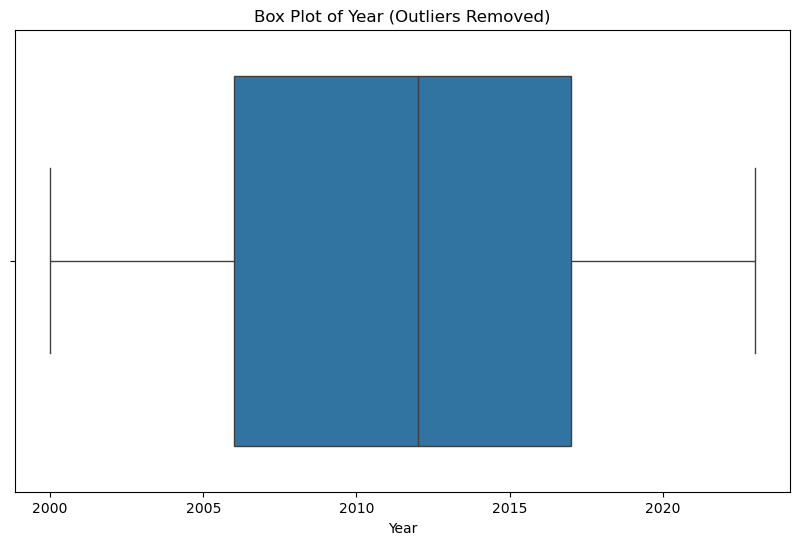

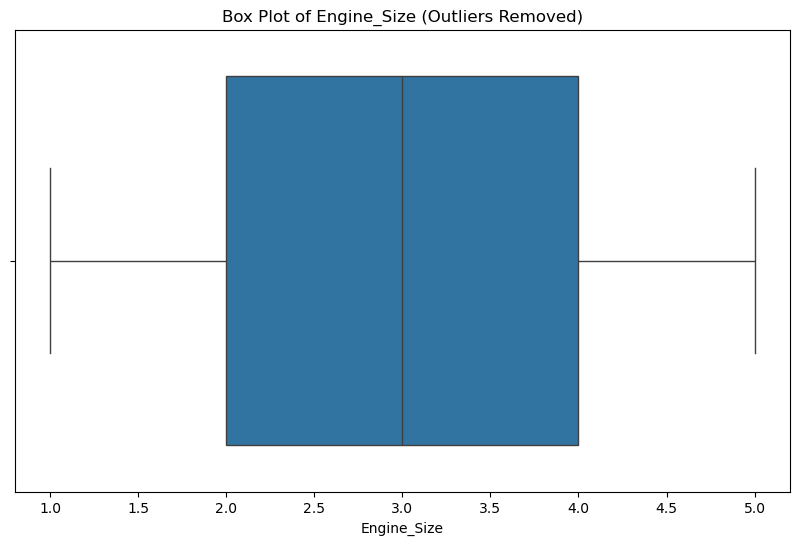

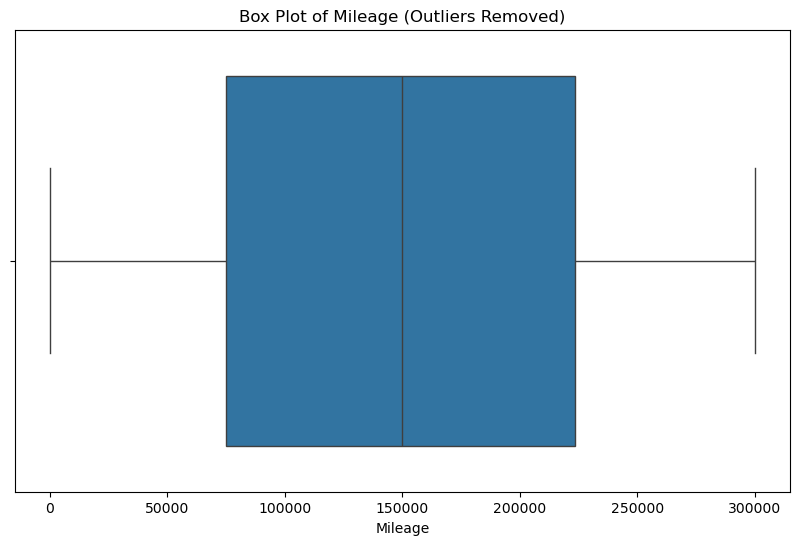

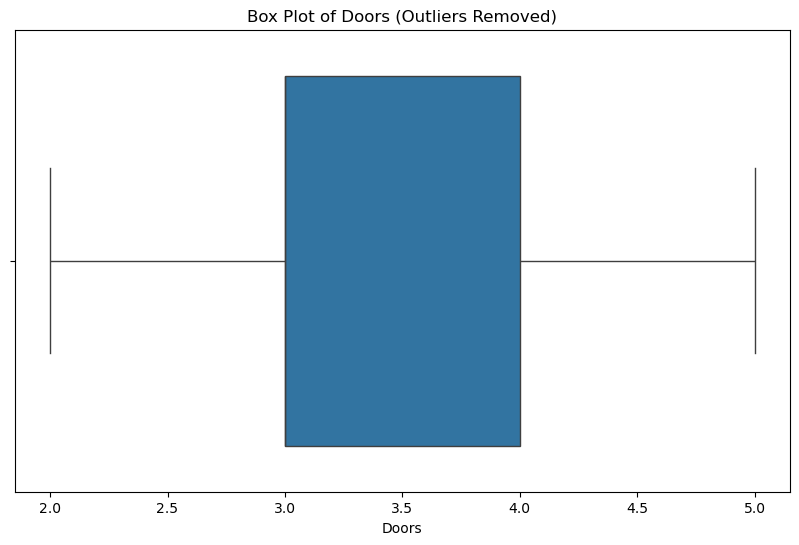

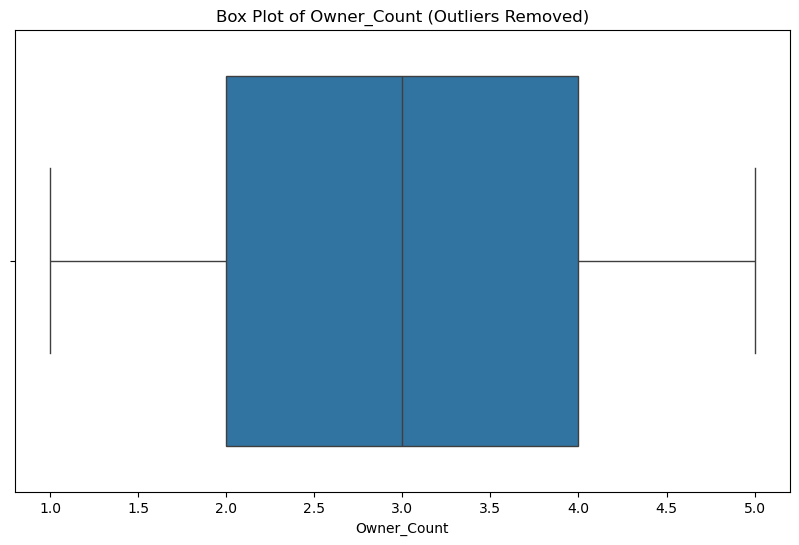

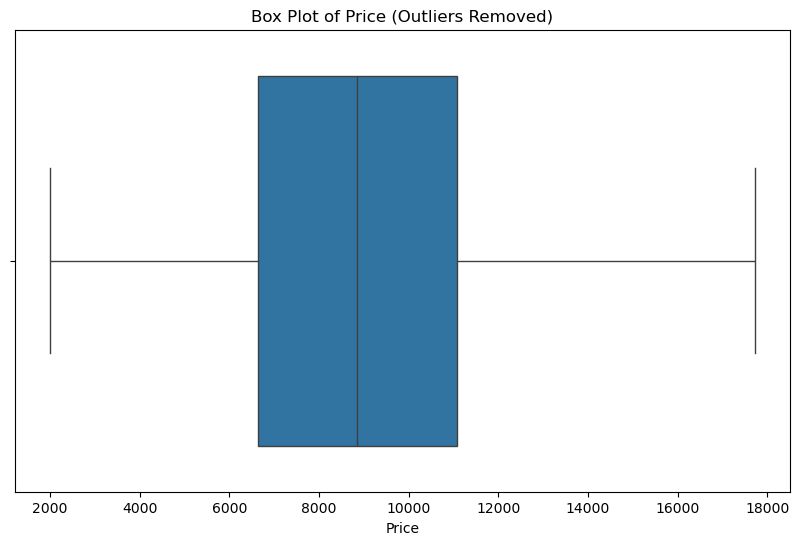

              Year  Engine_Size        Mileage        Doors  Owner_Count  \
count  9994.000000  9994.000000    9994.000000  9994.000000  9994.000000   
mean   2011.537823     2.999590  149321.466680     3.496498     2.990694   
std       6.895499     1.148962   86282.667676     1.110090     1.422755   
min    2000.000000     1.000000      25.000000     2.000000     1.000000   
25%    2006.000000     2.000000   74760.000000     3.000000     2.000000   
50%    2012.000000     3.000000  149674.000000     3.000000     3.000000   
75%    2017.000000     4.000000  223627.750000     4.000000     4.000000   
max    2023.000000     5.000000  299947.000000     5.000000     5.000000   

              Price  
count   9994.000000  
mean    8847.447969  
std     3105.371856  
min     2000.000000  
25%     6644.500000  
50%     8857.000000  
75%    11081.000000  
max    17719.000000  


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
carpred_df = pd.read_csv("C:/Users/Lenovo/OneDrive/ドキュメント/Studying Machine Learning/Car Price Prediction/car_price_dataset.csv")

# Fungsi untuk menghapus outlier hanya pada kolom numerik
def remove_outliers(df):
    # Pilih kolom numerik
    numeric_cols = df.select_dtypes(include='number').columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Buat kondisi untuk baris yang tidak memiliki outlier di kolom numerik
    condition = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[condition]

# Hapus outlier dari dataset
carpred_clean = remove_outliers(carpred_df)

# Tampilkan boxplot setelah outlier dihapus (hanya untuk kolom numerik)
numeric_cols = carpred_clean.select_dtypes(include='number').columns
for feature in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=carpred_clean[feature])
    plt.title(f'Box Plot of {feature} (Outliers Removed)')
    plt.show()

# Tampilkan ringkasan data setelah dibersihkan
print(carpred_clean.describe())


===== Cek Korelasi =====
Kolom non-numerik ditemukan: ['Brand', 'Model', 'Fuel_Type', 'Transmission']

Korelasi dengan Price:
Price           1.000000
Year            0.663036
Engine_Size     0.357403
Brand           0.003490
Model           0.002996
Owner_Count     0.002656
Doors           0.000511
Fuel_Type      -0.037178
Transmission   -0.218992
Mileage        -0.551227
Name: Price, dtype: float64


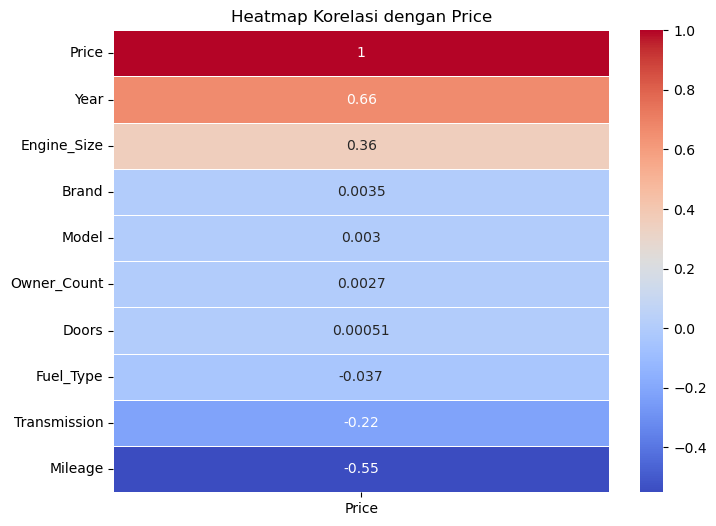

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

print("=" * 5, "Cek Korelasi", "=" * 5)

# Muat dataset
carpred_df = pd.read_csv("C:/Users/Lenovo/OneDrive/ドキュメント/Studying Machine Learning/Car Price Prediction/car_price_dataset.csv")

# Pisahkan kolom numerik & non-numerik
non_numeric_cols = carpred_df.select_dtypes(include=['object']).columns
numeric_cols = carpred_df.select_dtypes(exclude=['object']).columns

# Cek apakah ada kolom non-numerik
if len(non_numeric_cols) > 0:
    print("Kolom non-numerik ditemukan:", list(non_numeric_cols))
    
    # Lakukan Label Encoding untuk kolom kategori
    label_encoders = {}
    for col in non_numeric_cols:
        le = LabelEncoder()
        carpred_df[col] = le.fit_transform(carpred_df[col])  # Encode data
        label_encoders[col] = le  # Simpan encoder jika diperlukan nanti
else:
    print("Tidak ada kolom non-numerik, data sudah numerik semua.")

# Periksa korelasi antara variabel numerik (termasuk kategori yang sudah diencode)
korelasi = carpred_df.corr()

# Tampilkan tabel korelasi hanya untuk Price
print("\nKorelasi dengan Price:")
print(korelasi["Price"].sort_values(ascending=False))

# Tampilkan heatmap korelasi yang hanya fokus ke kolom "Price"
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi[["Price"]].sort_values(by="Price", ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi dengan Price')
plt.show()


# **Choose algorithm and Data Visualization**

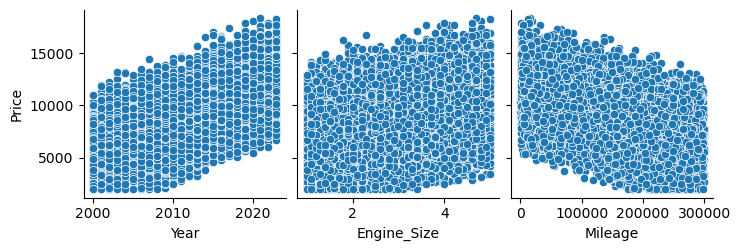

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(carpred_df, y_vars=['Price'], x_vars=['Year', 'Engine_Size', 'Mileage'], kind='scatter')
plt.show()

# **Cek menggunakan algoritma Linear Regression**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pilih fitur (X) dan target (y)
X = carpred_df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']]
y = carpred_df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform fitur
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat model Linear Regression dan latih dengan data yang sudah distandardisasi
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Harus pakai X_train_scaled

# Prediksi
y_pred = model.predict(X_test_scaled)  # Harus pakai X_test_scaled

# Evaluasi model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 888.8668606238983
MSE: 1137443.8645694468
R2 Score: 0.8762007882510096


## **Data Visualization**

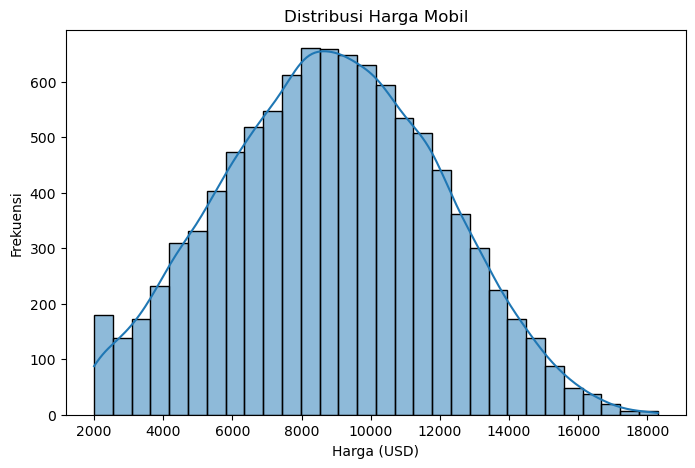

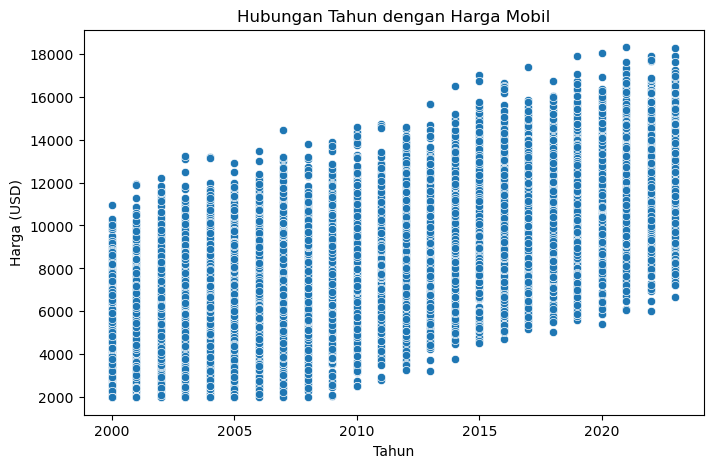

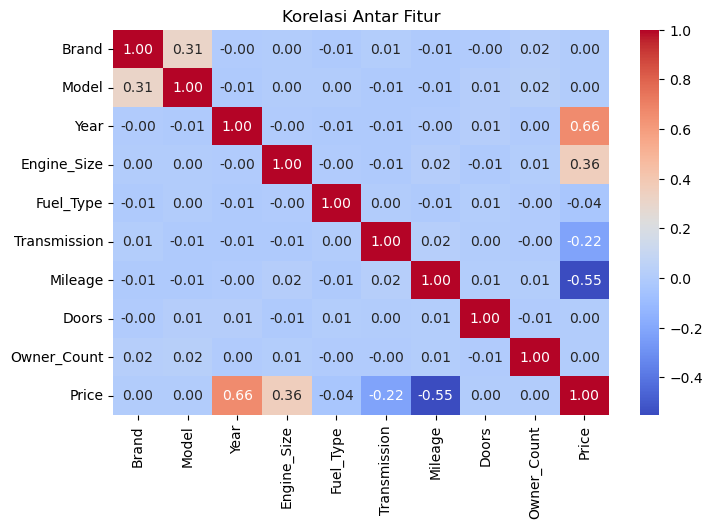

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek distribusi harga mobil
plt.figure(figsize=(8, 5))
sns.histplot(carpred_df['Price'], bins=30, kde=True)
plt.title("Distribusi Harga Mobil")
plt.xlabel("Harga (USD)")
plt.ylabel("Frekuensi")
plt.show()

# Cek hubungan tahun dan harga
plt.figure(figsize=(8, 5))
sns.scatterplot(x=carpred_df['Year'], y=carpred_df['Price'])
plt.title("Hubungan Tahun dengan Harga Mobil")
plt.xlabel("Tahun")
plt.ylabel("Harga (USD)")
plt.show()

# Cek korelasi antar fitur
plt.figure(figsize=(8, 5))
sns.heatmap(carpred_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()


# **Deployment**

In [12]:
import pickle

# Simpan model
with open("car_price_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Simpan scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Model dan Scaler berhasil disimpan!")


✅ Model dan Scaler berhasil disimpan!
